<a href="https://colab.research.google.com/github/Charotty/Learning_practis/blob/main/%D0%A3%D1%87%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


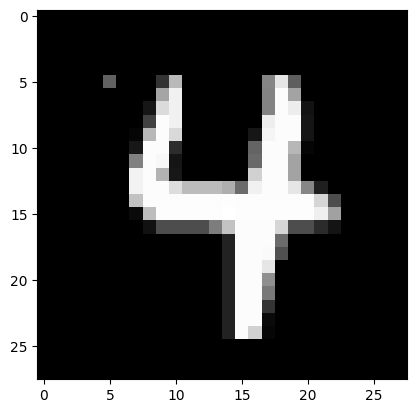

4
Shape of transformed X train: (60000, 784)
Shape of transformed y train (60000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1688/1688 [==============================] - 13s 6ms/step - loss: 2.1724 - accuracy: 0.3830 - val_loss: 1.9756 - val_accuracy: 0.5802
Epoch 2/100
1688/1688 [==============================] - 10s 6ms/step - los

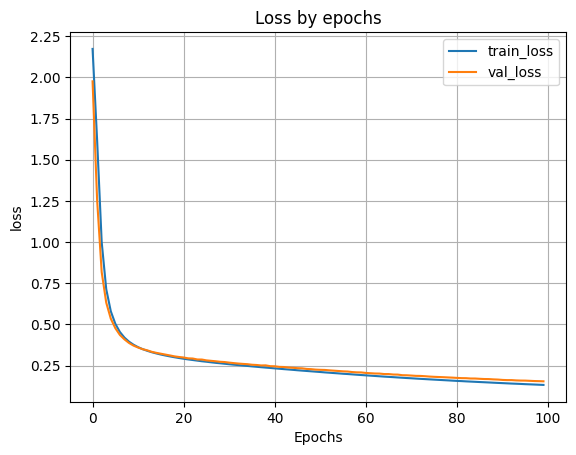

313/313 [==============================] - 1s 4ms/step - loss: 0.1492 - accuracy: 0.9559
Loss on test data: 0.1491864025592804
Accuracy on test data: 0.9559000134468079
1/1 [==============================] - 0s 121ms/step
NN output: [[3.8515160e-09 9.9652207e-01 1.1768602e-04 8.0443936e-04 1.5504222e-05
  3.7775979e-05 2.1543408e-05 1.3517402e-03 1.6355720e-04 9.6565089e-04]]


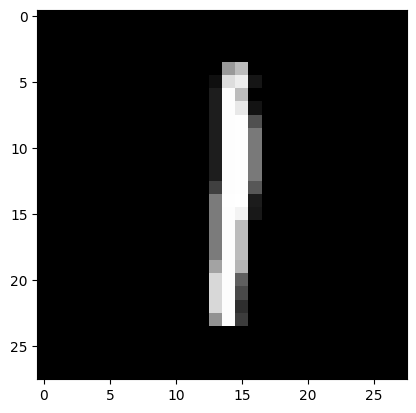

Real mark:  1
NN answer:  1


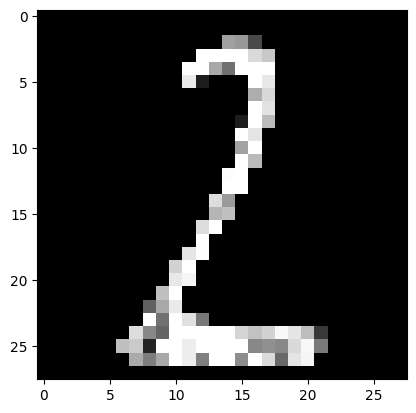

1/1 [==============================] - 0s 32ms/step
I think it's 3


In [11]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
#Загрузка датасета
(X_train,y_train), (X_test, y_test) = mnist.load_data()
#Объединение в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
#Разбивание по вариантам
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 10000,
                                                 train_size = 60000,
                                                 random_state = 123)
#Вывод рпазмерностей
print('Shape of X train:',X_train.shape)
print('Shape of y train:',y_train.shape)
#Вывод изоюражения
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.show()
#Вывод метки для этого изображения
print(y_train[123])
#Разворот каждого изображения 28*28 в вектор 784
num_pixels = X_train.shape[1]* X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels)/255
X_test = X_test.reshape(X_test.shape[0],num_pixels)/255
print('Shape of transformed X train:',X_train.shape)
#перевод меток в one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Shape of transformed y train',y_train.shape)
num_classes = y_train.shape[1]


#1.Создание модели - объявление её объектом класса Sequential
model = Sequential()
#2.Добавление первого скрытного слоя
model.add(Dense(units=300,input_dim=num_pixels,activation='sigmoid'))
#3.Добавление второго скрытног слоя
model.add(Dense(units=100,activation='sigmoid'))
#4.Добавление выходного слоя
model.add(Dense(units=num_classes,activation='softmax'))
#5.Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
#Вывод информации об архитекутре модели
print(model.summary())
#Обучение модели
H = model.fit(X_train,y_train,validation_split=0.1,epochs=100)
#вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.title('Loss by epochs')
plt.show()
#Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:',scores[0])
print('Accuracy on test data:',scores[1])

#Вывод тестового изображения и результата распознавания
n=123
result = model.predict(X_test[n:n+1])
print('NN output:',result)

plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ',str(np.argmax(y_test[n])))
print('NN answer: ',str(np.argmax(result)))

#загрузка собственного изображения
file_data = Image.open('test.png')
file_data = file_data.convert('L')
test_img = np.array(file_data)
#Вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
#предобработка
test_img = test_img /255
test_img = test_img.reshape(1,num_pixels)
#распозавание
result = model.predict(test_img)
print('I think it\'s',np.argmax(result))